Problem 3.14

In [2]:
library(astsa)

In [3]:
gtemp <- (gtemp_land)

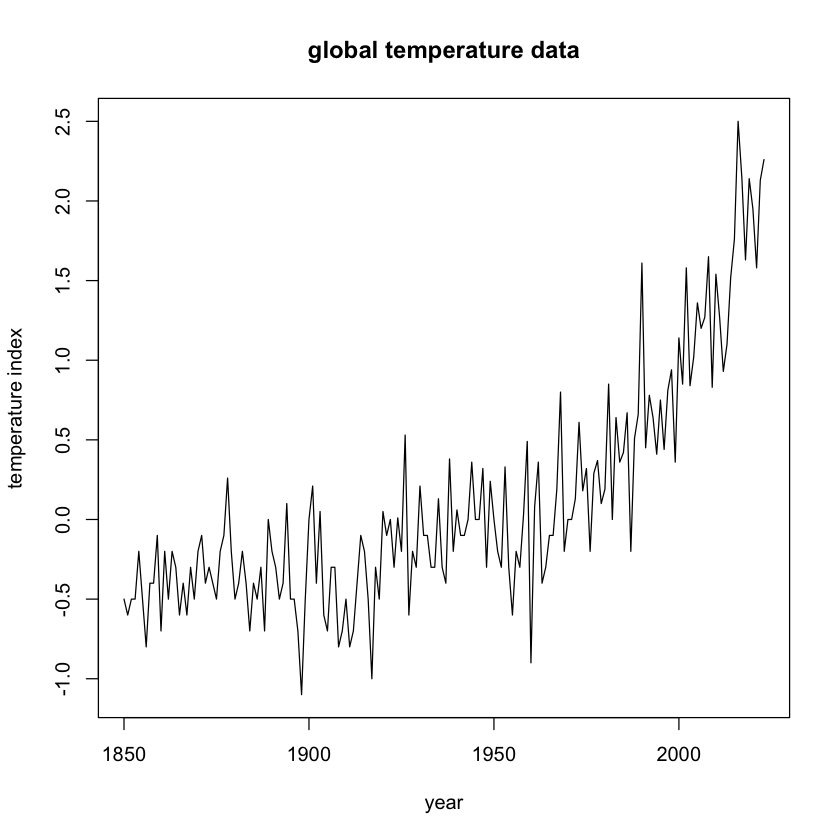

In [7]:
par(bg = "white")
plot(gtemp, ylab = "temperature index", xlab = "year", main = "global temperature data")

we definitely see an upwards trend so we have to take it out
we also have to shift the data to take log/sqrt since those maps don't have negative values in their domain. using sqrt so we can have 0 in our data.

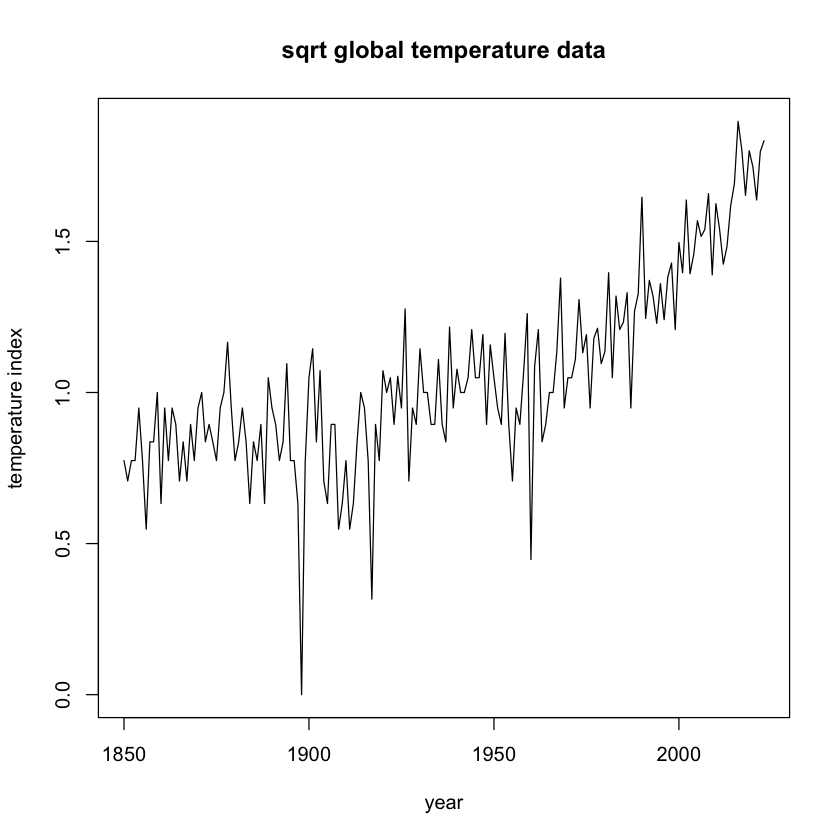

In [9]:
min_gtemp <- min(gtemp)
sqrt_gtemp <- sqrt(gtemp - min_gtemp)
par(bg = "white")
plot(sqrt_gtemp, ylab = "temperature index", xlab = "year", main = "sqrt global temperature data")

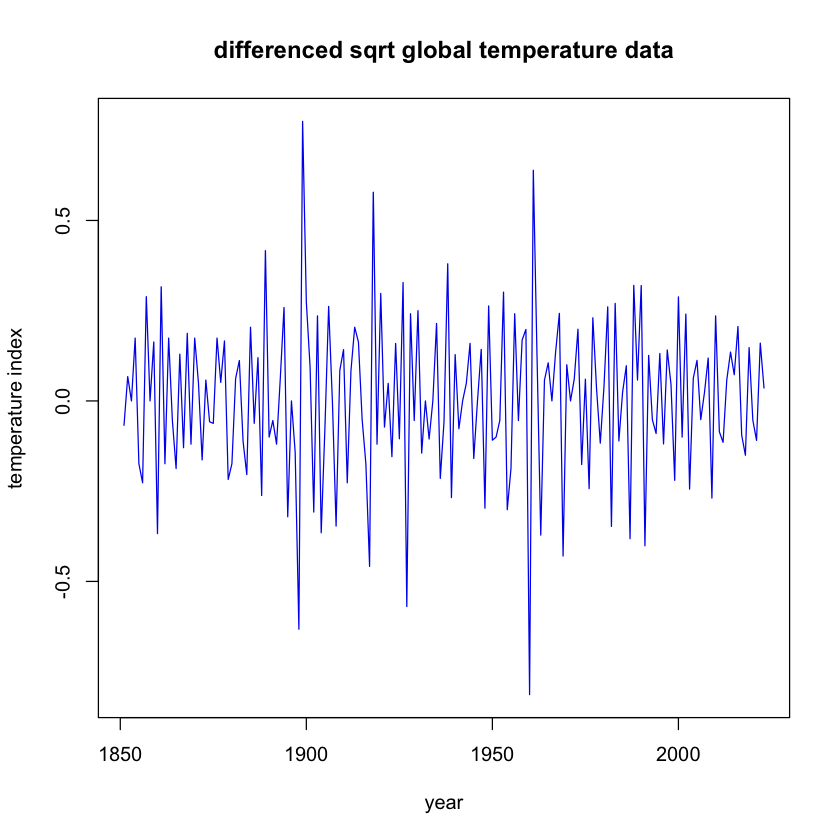

In [16]:
dsqrt_gtemp <- diff(sqrt_gtemp)
par(bg = "white")
plot(dsqrt_gtemp,
     ylab = "temperature index", 
     xlab = "year", 
     main = "differenced sqrt global temperature data",
     col = "blue2")

ACF,-0.47,-0.01,-0.03,-0.02,-0.03,0.11,-0.03,-0.08,0.06,0.02,⋯,0.03,-0.05,-0.04,0.00,0.13,-0.11,0.05,-0.06,-0.02,0.11
PACF,-0.47,-0.29,-0.24,-0.22,-0.25,-0.10,-0.05,-0.14,-0.08,0.00,⋯,0.10,0.06,0.01,-0.09,0.09,0.03,0.04,-0.03,-0.06,0.03


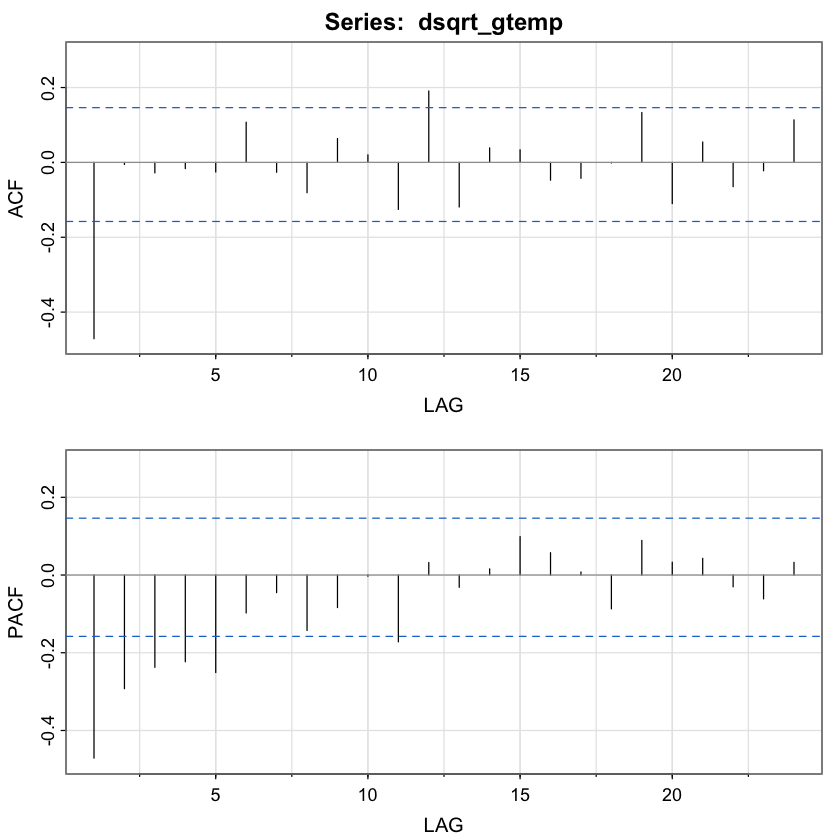

In [24]:
par(bg = "white")
acf2(dsqrt_gtemp)

we can clearly see here that lag cuts off sharply after 1 in ACF and cuts off sharply after 5 in PACF so I would intially expect a model like (5, 1, 1)

initial  value -1.488182 
iter   2 value -1.662829
iter   3 value -1.739990
iter   4 value -1.743382
iter   5 value -1.756557
iter   6 value -1.760929
iter   7 value -1.761101
iter   8 value -1.761577
iter   9 value -1.762214
iter  10 value -1.762312
iter  11 value -1.762331
iter  12 value -1.762332
iter  12 value -1.762332
iter  12 value -1.762332
final  value -1.762332 
converged
initial  value -1.768932 
iter   2 value -1.768939
iter   3 value -1.768957
iter   4 value -1.768963
iter   5 value -1.768963
iter   6 value -1.768963
iter   7 value -1.768963
iter   7 value -1.768963
iter   7 value -1.768963
final  value -1.768963 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1       -0.1185 0.1378 -0.8603  0.3909
ar2       -0.1356 0.1183 -1.1464  0.2533
ar3       -0.1495 0.1061 -1.4090  0.1607
ar4       -0.1226 0.0996 -1.2319  0.2197
ar5       -0.0698 0.0938 -0.7434  0.4583
ma1       -0.7267 0.1192 -6.0959  0.0000
constant   0.0058 0.00

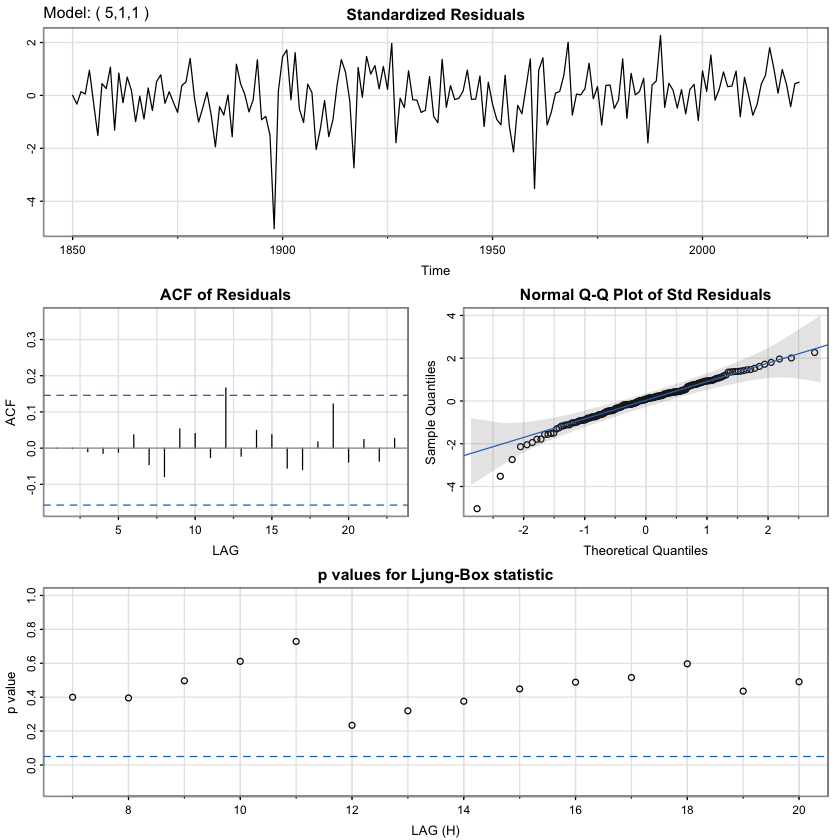

In [25]:
par(bg = "white")
sarima(sqrt_gtemp,
       p = 5,
       d = 1,
       q = 1
)

this model looks pretty good except that none of the AR terms are statistically significant. I will remove all AR terms and go from there.

initial  value -1.498781 
iter   2 value -1.675231
iter   3 value -1.724763
iter   4 value -1.758857
iter   5 value -1.760093
iter   6 value -1.763000
iter   7 value -1.763432
iter   8 value -1.763957
iter   9 value -1.764073
iter  10 value -1.764077
iter  10 value -1.764077
iter  10 value -1.764077
final  value -1.764077 
converged
initial  value -1.760494 
iter   2 value -1.760505
iter   3 value -1.760519
iter   4 value -1.760526
iter   4 value -1.760526
iter   4 value -1.760526
final  value -1.760526 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE  t.value p.value
ma1       -0.8444 0.0362 -23.3094  0.0000
constant   0.0057 0.0021   2.7045  0.0075

sigma^2 estimated as 0.02935569 on 171 degrees of freedom 
 
AIC = -0.6484927  AICc = -0.6480847  BIC = -0.5938114 
 


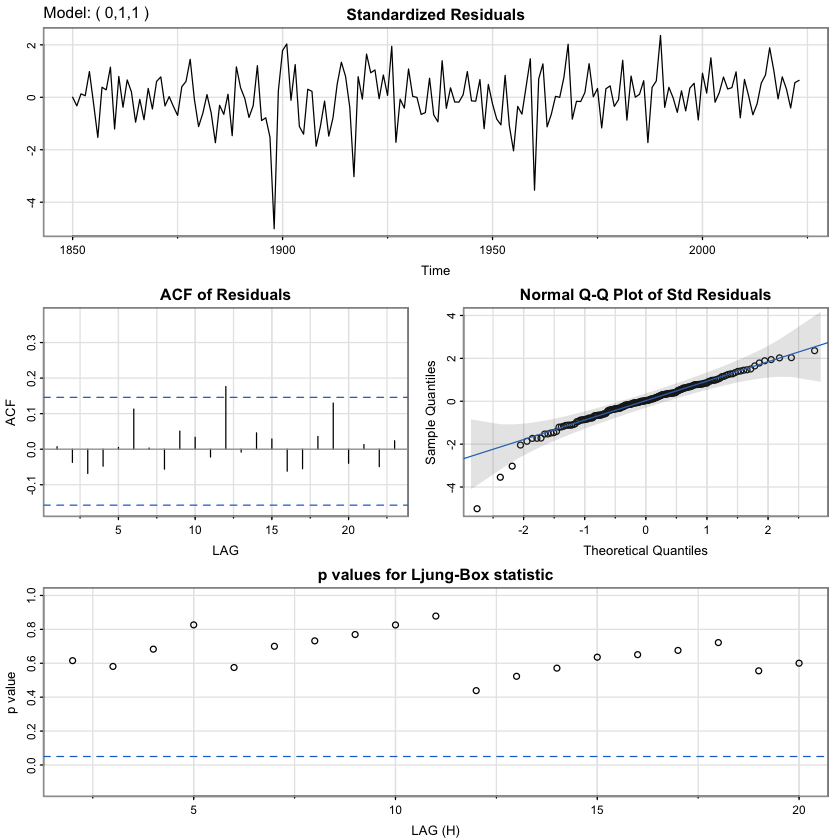

In [26]:
par(bg = "white")
sarima(sqrt_gtemp,
       p = 0,
       d = 1,
       q = 1
)

our coefficiants are still signifcant so now I want to add on ar terms to see if perhaps we just need less of them than before for our model.

initial  value -1.496196 
iter   2 value -1.662393
iter   3 value -1.703150
iter   4 value -1.734780
iter   5 value -1.753326
iter   6 value -1.759459
iter   7 value -1.759852
iter   8 value -1.759955
iter   9 value -1.760145
iter  10 value -1.760239
iter  11 value -1.760328
iter  12 value -1.760347
iter  12 value -1.760347
iter  12 value -1.760347
final  value -1.760347 
converged
initial  value -1.760570 
iter   2 value -1.760589
iter   3 value -1.760603
iter   4 value -1.760609
iter   5 value -1.760609
iter   5 value -1.760609
iter   5 value -1.760609
final  value -1.760609 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE  t.value p.value
ar1        0.0145 0.0856   0.1698  0.8654
ma1       -0.8476 0.0400 -21.1725  0.0000
constant   0.0057 0.0021   2.7137  0.0073

sigma^2 estimated as 0.0293518 on 170 degrees of freedom 
 
AIC = -0.637099  AICc = -0.6362781  BIC = -0.5641905 
 


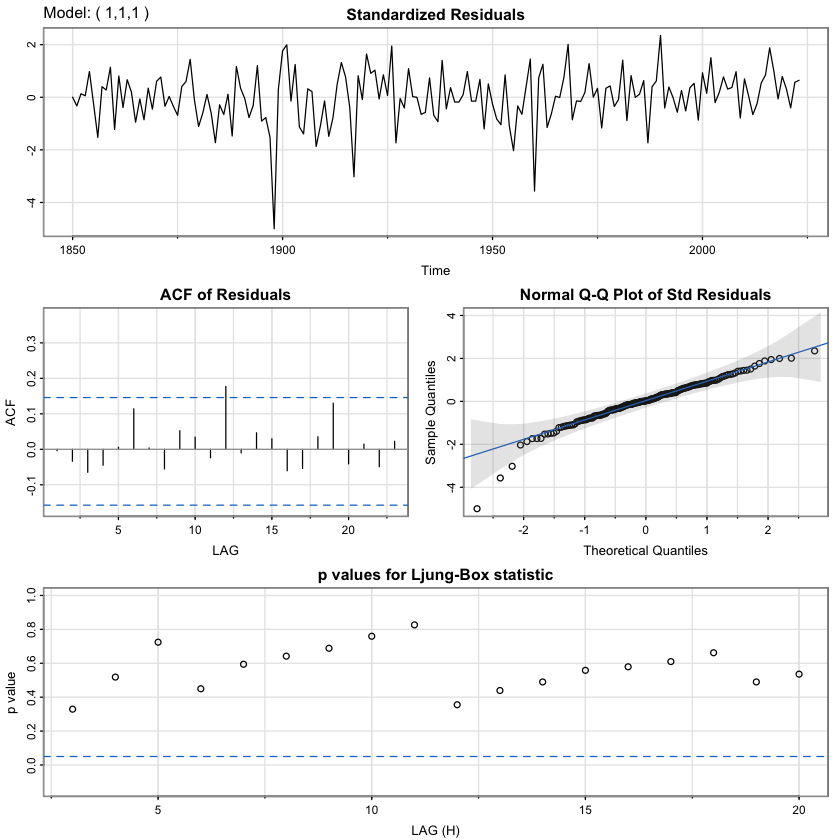

In [33]:
par(bg = "white")
sarima(sqrt_gtemp,
       p = 1,
       d = 1,
       q = 1
)

ok the ar term is still not even close to significant. let's look at our original acf/pacf plot to see if we can come up with a second model to compare to (0,1,1). we can still see the ACF of residuals are not behaving like white noise quite yet. 

ACF,-0.47,-0.01,-0.03,-0.02,-0.03,0.11,-0.03,-0.08,0.06,0.02,⋯,0.03,-0.05,-0.04,0.00,0.13,-0.11,0.05,-0.06,-0.02,0.11
PACF,-0.47,-0.29,-0.24,-0.22,-0.25,-0.10,-0.05,-0.14,-0.08,0.00,⋯,0.10,0.06,0.01,-0.09,0.09,0.03,0.04,-0.03,-0.06,0.03


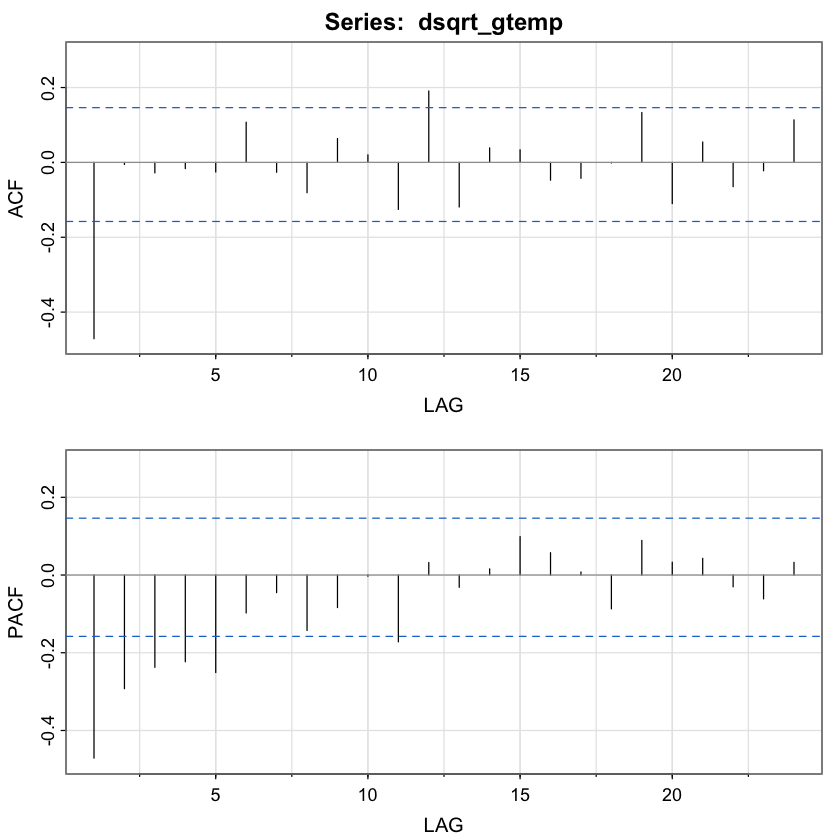

In [28]:
par(bg = "white")
acf2(dsqrt_gtemp)

perhaps we can consider the ACF a trail off and PACF to cut off after 5 so we can try a (5,1,0) model

initial  value -1.488182 
iter   2 value -1.617347
iter   3 value -1.674716
iter   4 value -1.717809
iter   5 value -1.738029
iter   6 value -1.741220
iter   7 value -1.744505
iter   8 value -1.745842
iter   9 value -1.745877
iter  10 value -1.745877
iter  11 value -1.745877
iter  11 value -1.745877
iter  11 value -1.745877
final  value -1.745877 
converged
initial  value -1.753987 
iter   2 value -1.753995
iter   3 value -1.754007
iter   4 value -1.754013
iter   5 value -1.754016
iter   5 value -1.754016
iter   5 value -1.754016
final  value -1.754016 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE  t.value p.value
ar1       -0.7853 0.0735 -10.6826  0.0000
ar2       -0.6294 0.0896  -7.0215  0.0000
ar3       -0.5183 0.0932  -5.5606  0.0000
ar4       -0.4013 0.0890  -4.5105  0.0000
ar5       -0.2475 0.0729  -3.3957  0.0009
constant   0.0058 0.0037   1.5673  0.1189

sigma^2 estimated as 0.02976272 on 167 degrees of freedom 
 
AIC = -0.5892294  AICc = -0.

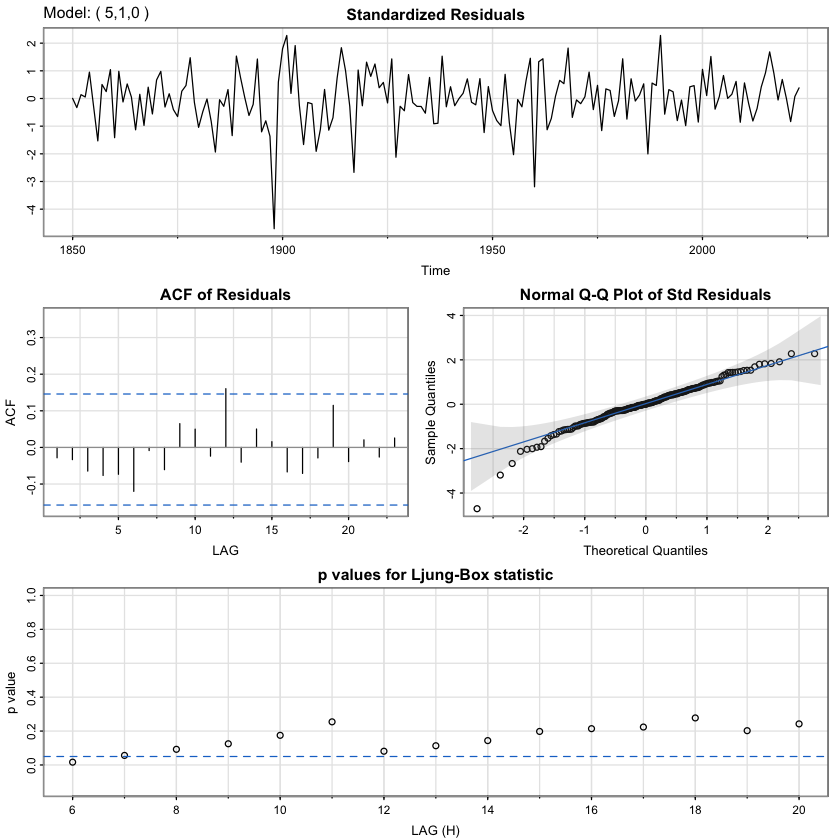

In [29]:
par(bg = "white")
sarima(sqrt_gtemp,
       p = 5,
       d = 1,
       q = 0
)

ok now we do see all of the AR terms are significant.
this model looks ok but let us compare AIC/BIC terms now

(0,1,1): AIC = -0.6484927  AICc = -0.6480847  BIC = -0.5938114 

(5,1,0): AIC = -0.5892294  AICc = -0.5863044  BIC = -0.4616395 

we can clearly see the values for (0,1,1) are lower and the residuals for both models are about equally close to being white noise. Therefore, I will use (0,1,1) to do my forecasting.

$pred
Time Series:
Start = 2024 
End = 2033 
Frequency = 1 
 [1] 1.745233 1.750904 1.756576 1.762247 1.767918 1.773589 1.779260 1.784931
 [9] 1.790602 1.796273

$se
Time Series:
Start = 2024 
End = 2033 
Frequency = 1 
 [1] 0.1713350 0.1733956 0.1754320 0.1774450 0.1794355 0.1814041 0.1833516
 [8] 0.1852786 0.1871857 0.1890736

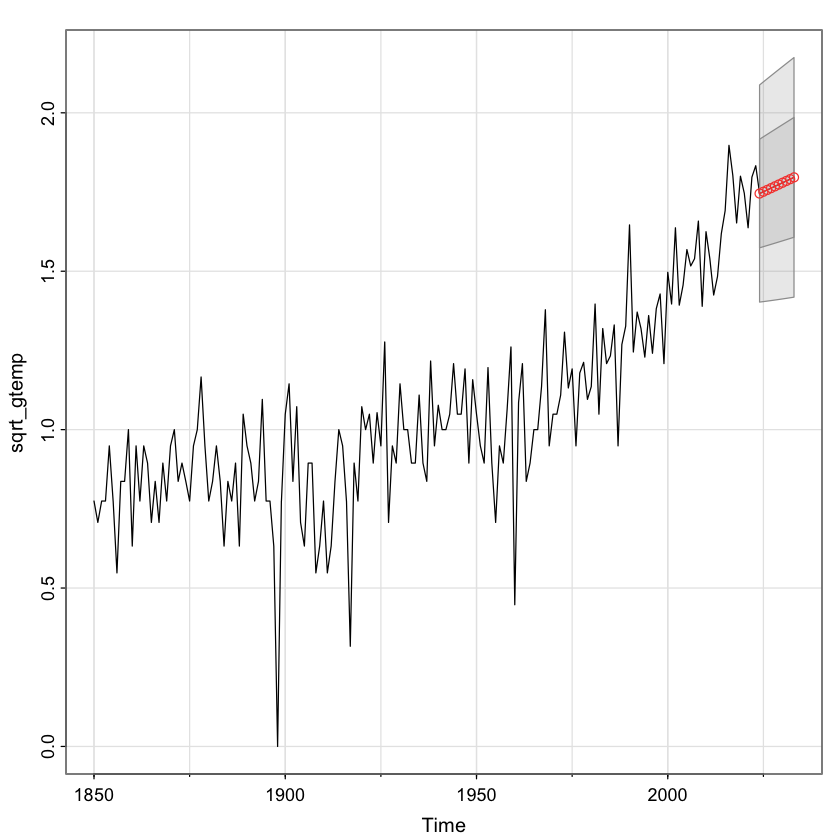

In [34]:
par(bg = "white")
forecast <- sarima.for(sqrt_gtemp, n.ahead=10, p=0, d=1, q=1, plot.all=TRUE)
forecast

So if we square the predicted values and then shift down by the absolute value of the min of the original data then we will get our desired predicted values. Our values look a little linear perhaps but after we square the will increase more sharply like would expect them to.

3.15

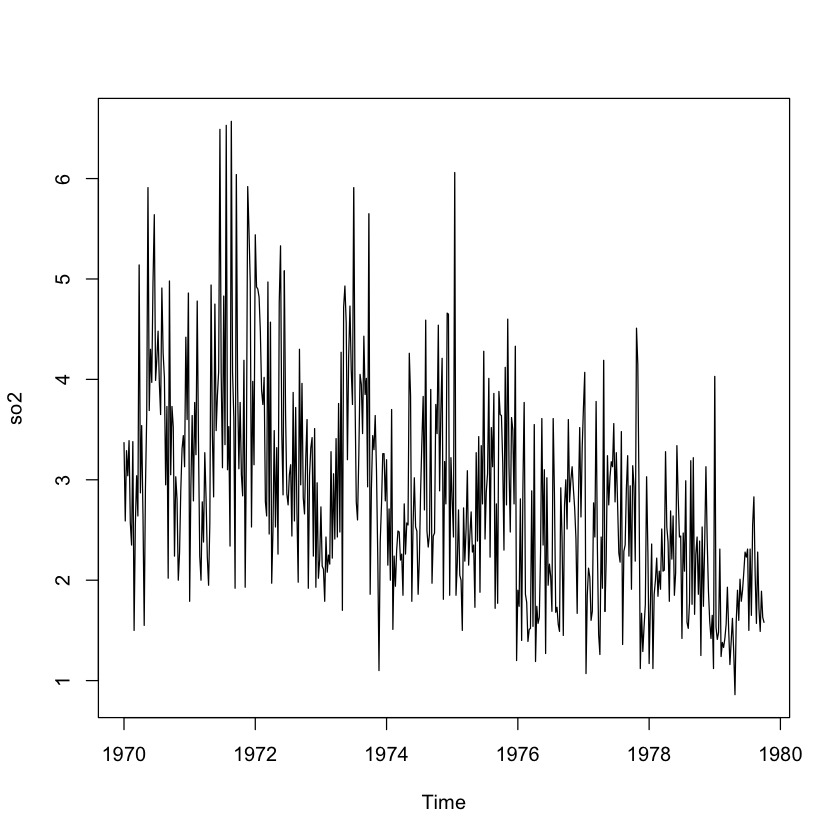

In [37]:
par(bg = "white")
plot(so2)

We can see a slight downward trend in this data so we need to take a first difference of the data. Variance seems to be stable so I don't think we need to log. I will look at the log data, however.

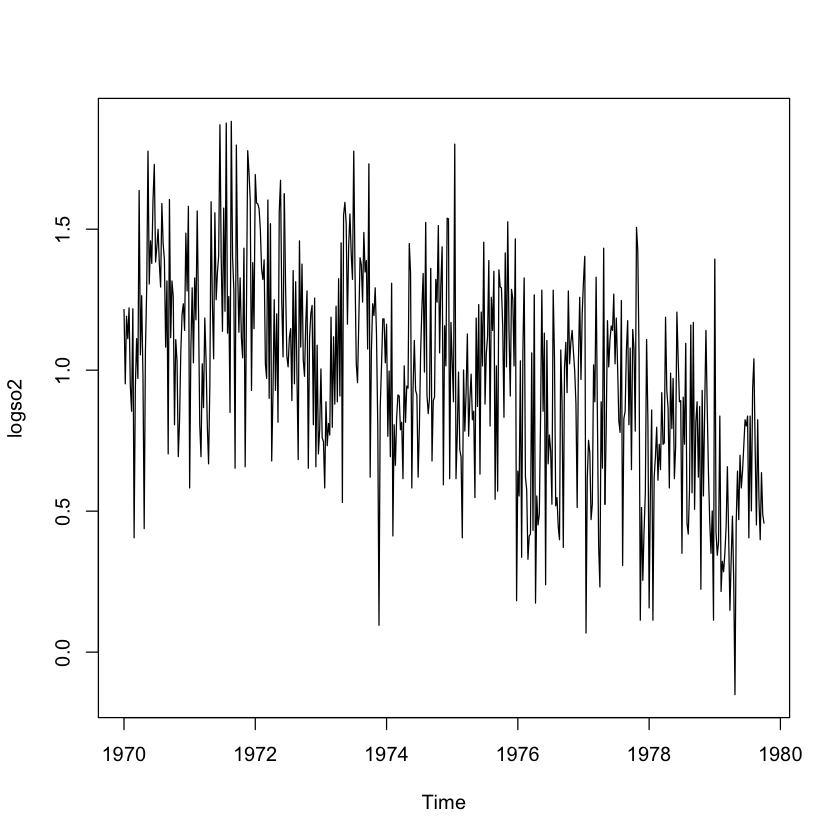

In [42]:
logso2 <- log(so2)

par(bg = "white")
plot(logso2)

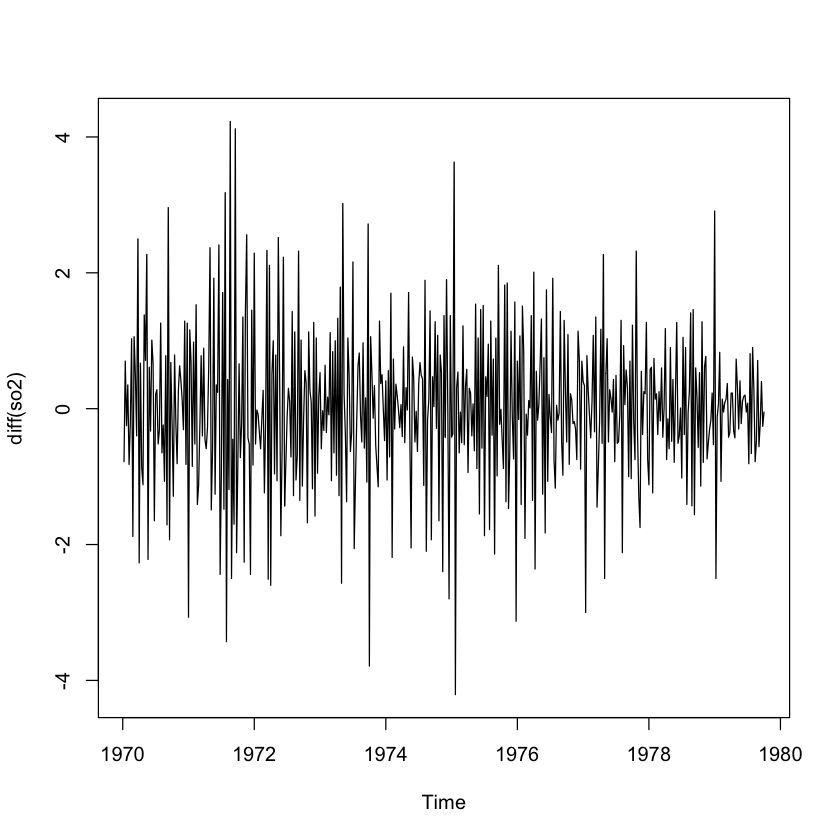

In [41]:
par(bg = "white")
plot(diff(so2))

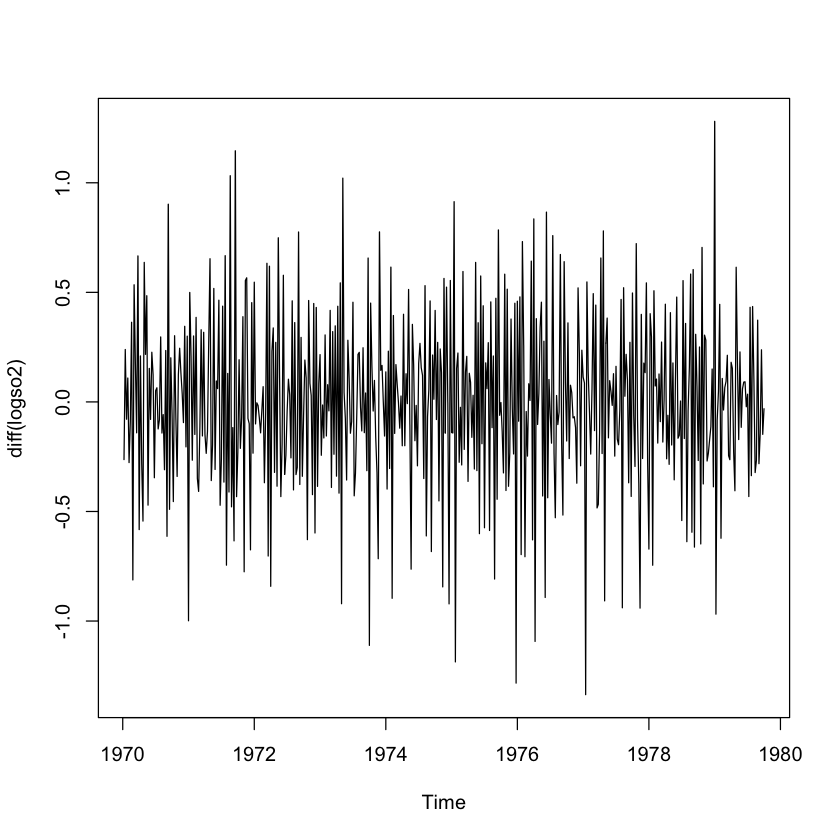

In [43]:
par(bg = "white")
plot(diff(logso2))

Looking at these two charts, I actually think the variance is more consistent with the log data so I shall use logso2 from now on.

ACF,-0.55,0.14,-0.15,0.08,-0.02,0.00,-0.02,0.07,-0.08,0.10,⋯,-0.06,0.08,-0.07,0.03,-0.01,0.02,-0.07,0.06,-0.01,0.02
PACF,-0.55,-0.22,-0.26,-0.19,-0.13,-0.13,-0.14,-0.03,-0.08,0.03,⋯,-0.03,0.04,0.00,0.05,-0.01,0.03,-0.03,0.00,-0.02,-0.02


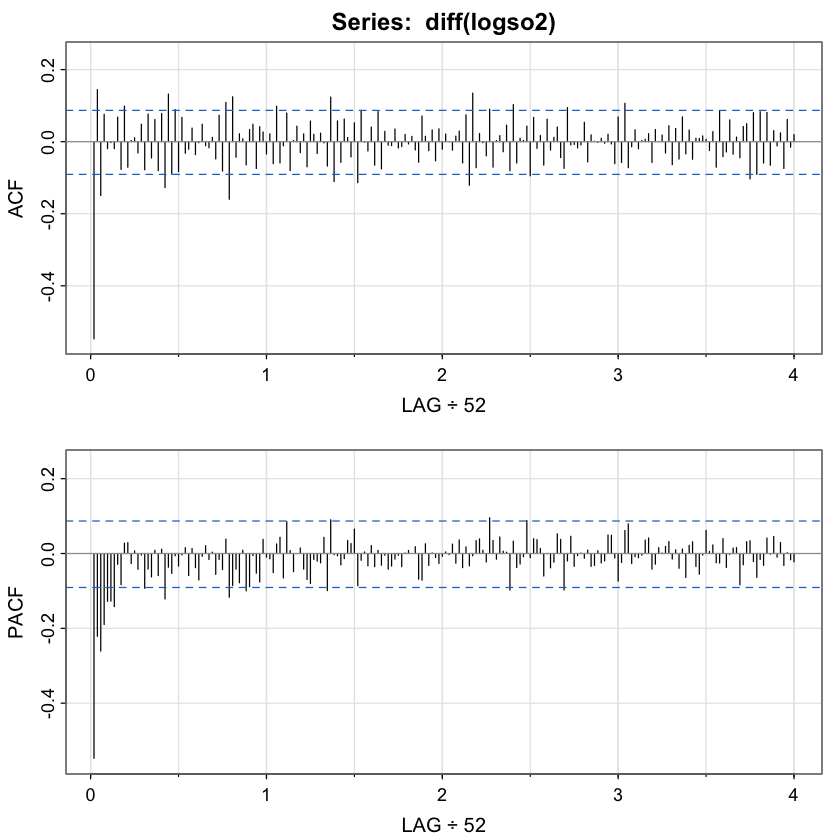

In [55]:
par(bg = "white")
acf2(diff(logso2))

It seems that ACF is trailing off after 3 or 1 and PACF cuts off after about lag 7. So I will initialy use the model (7,1,3)

initial  value -0.895822 
iter   2 value -1.031770
iter   3 value -1.075576
iter   4 value -1.143321
iter   5 value -1.148218
iter   6 value -1.167096
iter   7 value -1.178775
iter   8 value -1.179971
iter   9 value -1.181008
iter  10 value -1.182481
iter  11 value -1.183297
iter  12 value -1.184455
iter  13 value -1.185322
iter  14 value -1.185953
iter  15 value -1.189164
iter  16 value -1.191386
iter  17 value -1.192055
iter  18 value -1.192638
iter  19 value -1.193127
iter  20 value -1.193559
iter  21 value -1.194102
iter  22 value -1.194547
iter  23 value -1.199911
iter  24 value -1.200159
iter  25 value -1.200532
iter  26 value -1.201619
iter  27 value -1.202577
iter  28 value -1.203292
iter  29 value -1.204726
iter  30 value -1.205058
iter  30 value -1.205058
iter  30 value -1.205058
final  value -1.205058 
converged
initial  value -1.198363 
iter   2 value -1.198627
iter   3 value -1.199059
iter   4 value -1.199538
iter   5 value -1.199856
iter   6 value -1.199882
iter   7 value

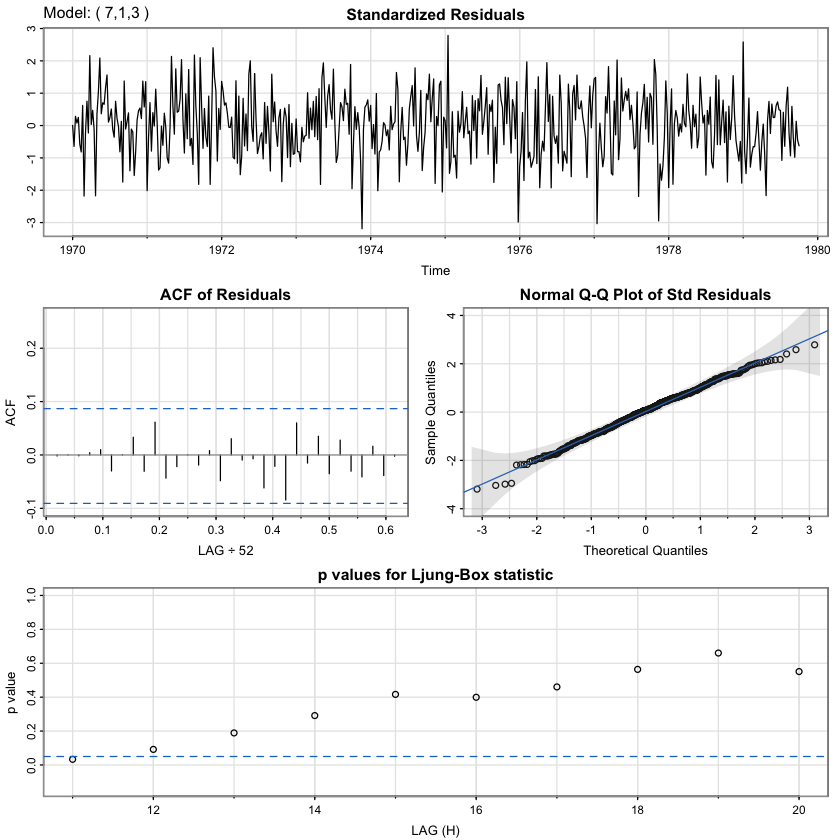

In [56]:
par(bg = "white")
sarima(logso2,
       p = 7,
       d = 1,
       q = 3
       )

Our model is looking decent. All of the coefficianets are statistically significant except AR 5-7 terms. So I will test out (4,1,3)

initial  value -0.897514 
iter   2 value -1.035141
iter   3 value -1.078311
iter   4 value -1.138427
iter   5 value -1.144485
iter   6 value -1.149557
iter   7 value -1.152974
iter   8 value -1.163563
iter   9 value -1.183832
iter  10 value -1.186249
iter  11 value -1.186788
iter  12 value -1.187017
iter  13 value -1.187456
iter  14 value -1.187706
iter  15 value -1.189014
iter  16 value -1.189449
iter  17 value -1.189744
iter  18 value -1.190272
iter  19 value -1.190275
iter  20 value -1.190986
iter  21 value -1.190989
iter  22 value -1.191653
iter  23 value -1.192160
iter  24 value -1.192520
iter  25 value -1.193095
iter  25 value -1.193095
iter  26 value -1.194567
iter  26 value -1.194567
iter  27 value -1.194654
iter  27 value -1.194654
iter  28 value -1.194662
iter  28 value -1.194662
iter  29 value -1.194662
iter  29 value -1.194662
iter  29 value -1.194662
final  value -1.194662 
converged
initial  value -1.186167 
iter   2 value -1.188526
iter   3 value -1.188539
iter   4 value

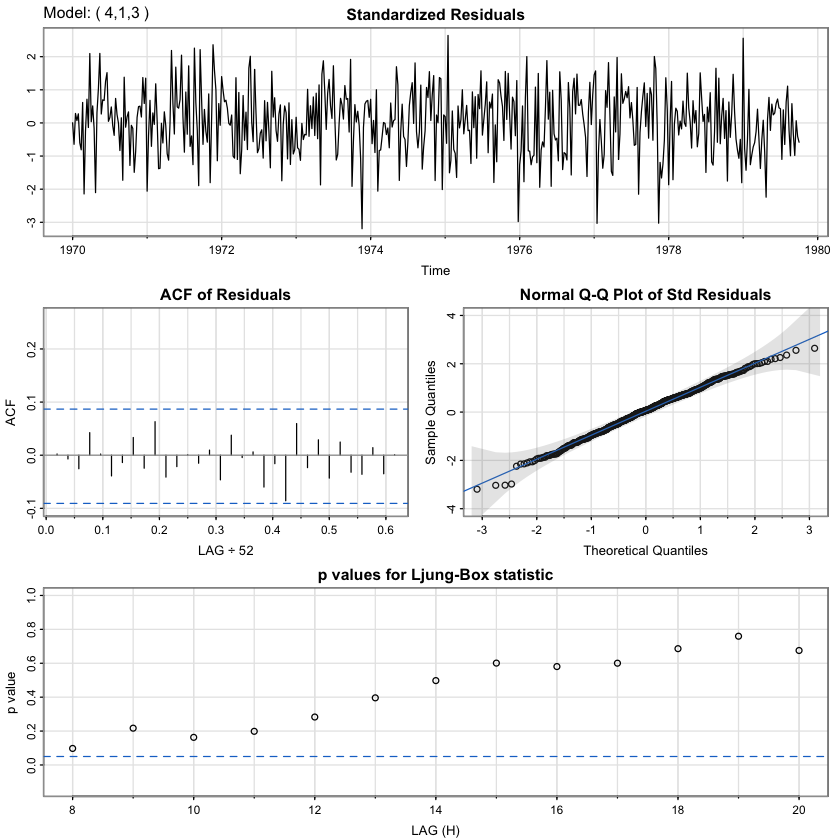

In [57]:
par(bg = "white")
sarima(logso2,
       p = 4,
       d = 1,
       q = 3
       )

This model is looking very good. All the coefficients are significant and the residuals are looking like white noise. I will now try some other models for comparisons. like (7,1,1) and (4,1,1)

initial  value -0.895822 
iter   2 value -1.063537
iter   3 value -1.155015
iter   4 value -1.161708
iter   5 value -1.169828
iter   6 value -1.176149
iter   7 value -1.178453
iter   8 value -1.178627
iter   9 value -1.178678
iter  10 value -1.178693
iter  11 value -1.178722
iter  12 value -1.178824
iter  13 value -1.179021
iter  14 value -1.179264
iter  15 value -1.179521
iter  16 value -1.179666
iter  17 value -1.179690
iter  18 value -1.179694
iter  19 value -1.179694
iter  20 value -1.179694
iter  20 value -1.179694
final  value -1.179694 
converged
initial  value -1.184523 
iter   2 value -1.184525
iter   3 value -1.184530
iter   4 value -1.184542
iter   5 value -1.184568
iter   6 value -1.184653
iter   7 value -1.184668
iter   8 value -1.184670
iter   9 value -1.184670
iter   9 value -1.184670
iter   9 value -1.184670
final  value -1.184670 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1       -0.4034 0.2560 -1.5757  0.1157
ar

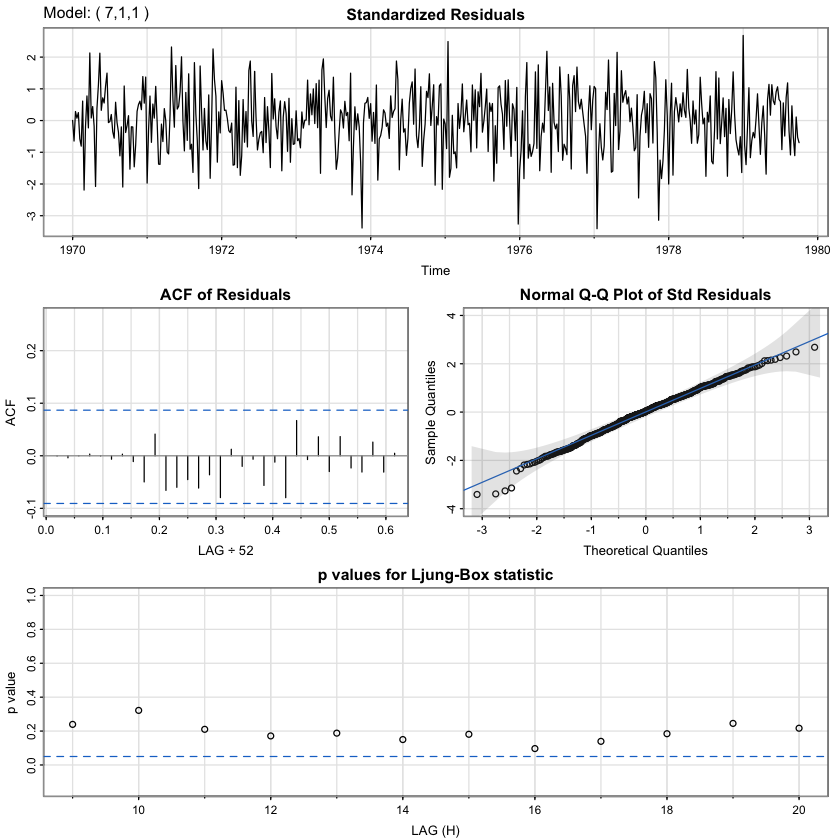

In [58]:
par(bg = "white")
sarima(logso2,
       p = 7,
       d = 1,
       q = 1
       )

This model is not looking very good. All but one of the coefficients are not statistically significant. Perhaps removing the MA term will help.

initial  value -0.895822 
iter   2 value -0.995466
iter   3 value -1.087515
iter   4 value -1.109667
iter   5 value -1.146525
iter   6 value -1.162431
iter   7 value -1.173278
iter   8 value -1.178229
iter   9 value -1.178587
iter  10 value -1.178912
iter  11 value -1.179129
iter  12 value -1.179132
iter  13 value -1.179132
iter  13 value -1.179132
iter  13 value -1.179132
final  value -1.179132 
converged
initial  value -1.183055 
iter   2 value -1.183056
iter   3 value -1.183057
iter   4 value -1.183058
iter   5 value -1.183058
iter   6 value -1.183058
iter   6 value -1.183058
iter   6 value -1.183058
final  value -1.183058 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE  t.value p.value
ar1       -0.8334 0.0440 -18.9548  0.0000
ar2       -0.5897 0.0565 -10.4419  0.0000
ar3       -0.5655 0.0607  -9.3210  0.0000
ar4       -0.4272 0.0628  -6.8020  0.0000
ar5       -0.3084 0.0606  -5.0927  0.0000
ar6       -0.2424 0.0563  -4.3075  0.0000
ar7       -0.14

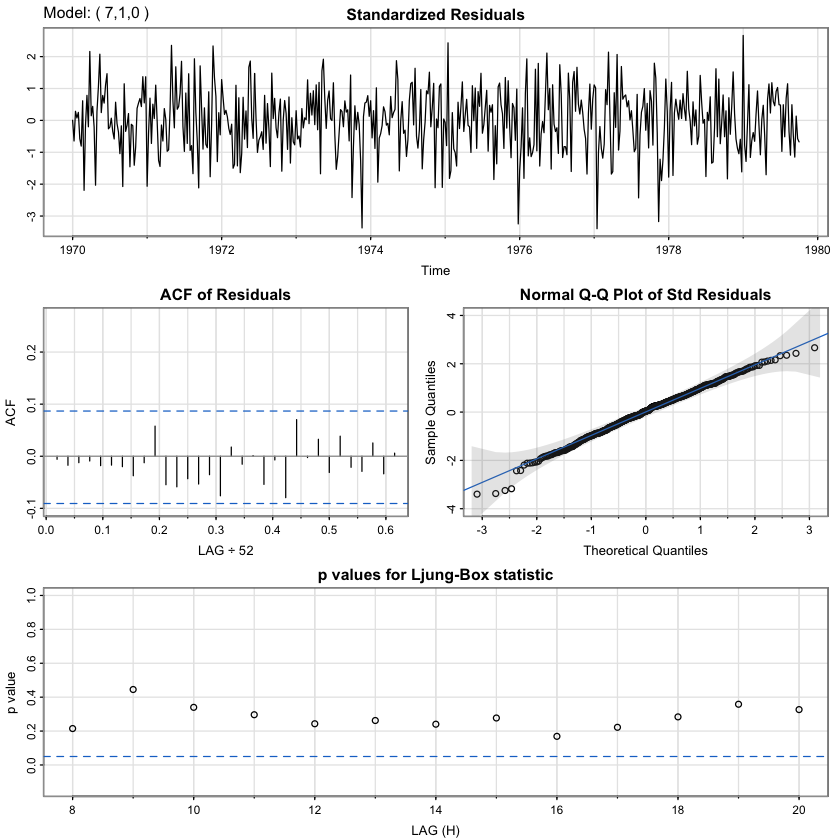

In [59]:
par(bg = "white")
sarima(logso2,
       p = 7,
       d = 1,
       q = 0
       )

This model is looking very good. The residuals are white noise and all the coefficients are statistically significant.

initial  value -0.897514 
iter   2 value -1.067447
iter   3 value -1.157815
iter   4 value -1.162558
iter   5 value -1.175293
iter   6 value -1.176154
iter   7 value -1.176853
iter   8 value -1.177995
iter   9 value -1.180506
iter  10 value -1.181604
iter  11 value -1.181658
iter  12 value -1.181783
iter  13 value -1.182219
iter  14 value -1.186698
iter  15 value -1.186859
iter  16 value -1.188609
iter  17 value -1.189960
iter  18 value -1.191242
iter  19 value -1.191395
iter  20 value -1.193852
iter  21 value -1.196189
iter  22 value -1.196193
iter  23 value -1.196710
iter  24 value -1.196849
iter  25 value -1.199450
iter  26 value -1.199618
iter  27 value -1.199757
iter  28 value -1.200742
iter  29 value -1.201028
iter  29 value -1.201028
iter  30 value -1.201075
iter  30 value -1.201075
iter  30 value -1.201075
final  value -1.201075 
converged
initial  value -1.192681 
iter   2 value -1.192848
iter   3 value -1.193713
iter   4 value -1.193969
iter   5 value -1.194174
iter   6 value

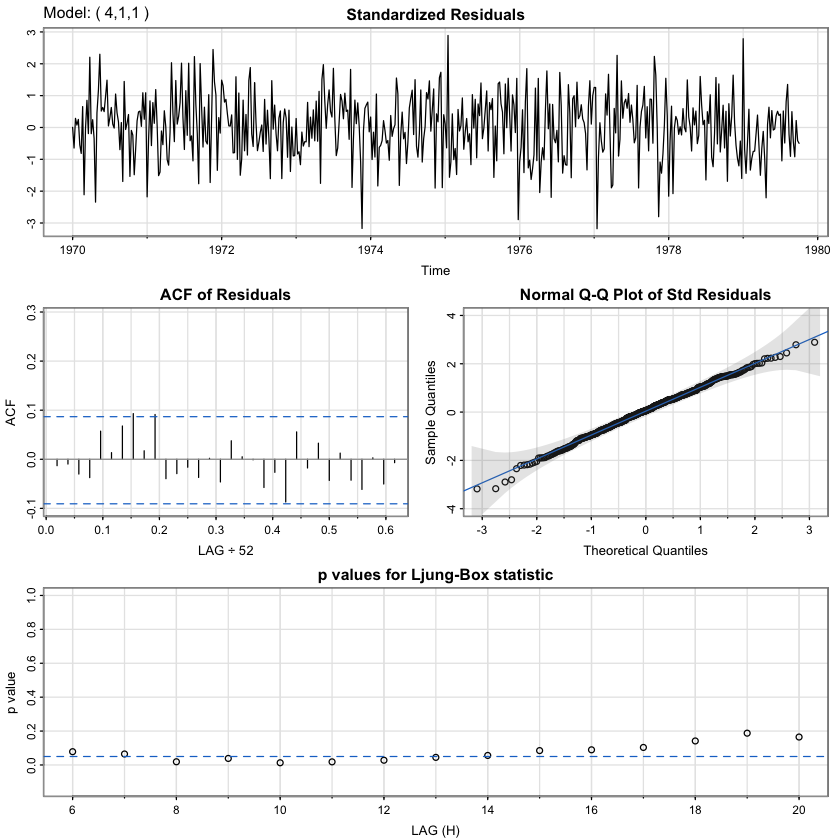

In [60]:
par(bg = "white")
sarima(logso2,
       p = 4,
       d = 1,
       q = 1
       )

This model is alright. Most of the coefficients are significant but it doesn't perform too well looking at the Ljung-Box statistic.

Therefore I will compare (4,1,3) and (7,1,0)

(4,1,3): AIC = 0.4614462  AICc = 0.4620165  BIC = 0.5365085

(7,1,0): AIC = 0.5072633  AICc = 0.5078337  BIC = 0.5823257

The AIC/BIC values are lower for (4,1,3) so I shall use that model

$pred
Time Series:
Start = c(1979, 41) 
End = c(1979, 44) 
Frequency = 52 
[1] 0.5811833 0.5732594 0.5817888 0.5689195

$se
Time Series:
Start = c(1979, 41) 
End = c(1979, 44) 
Frequency = 52 
[1] 0.2982067 0.2996322 0.3054863 0.3057932

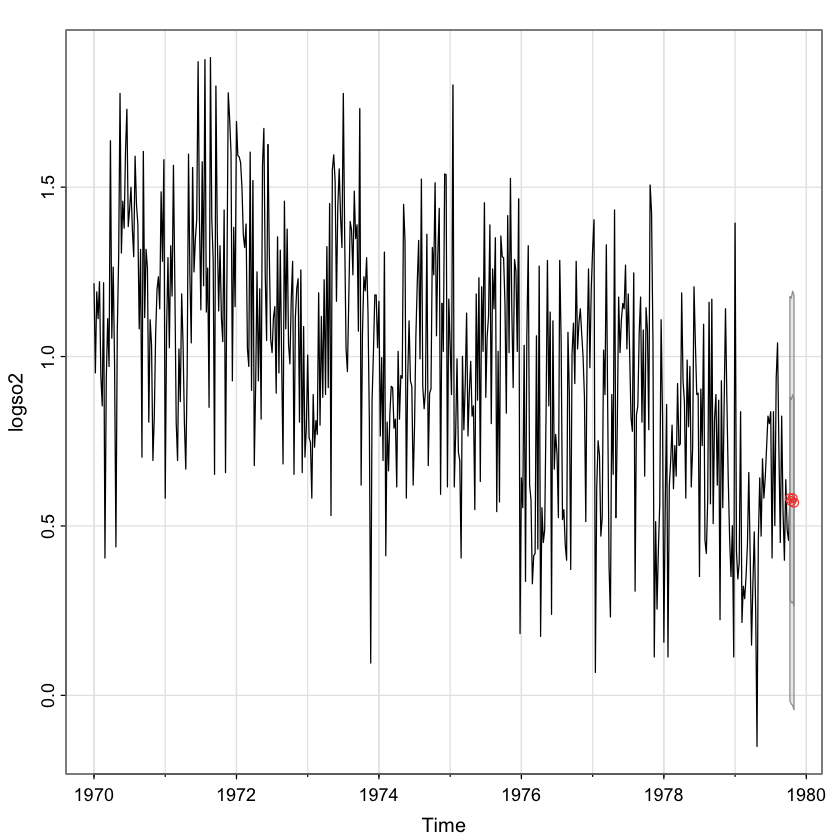

In [63]:
par(bg = "white")
forecast <- sarima.for(logso2, n.ahead=4, p=4, d=1, q=3, plot.all=TRUE)
forecast

In [1]:
pred_log <- c(0.581183275511394, 0.573259438177547, 0.581788768176874, 0.568919527553931)

se_log <- c(0.298206694473104, 0.299632202706906, 0.305486294781254, 0.30579324427386)

point_forecast <- exp(pred_log)
lower_95 <- exp(pred_log - 1.96 * se_log)
upper_95 <- exp(pred_log + 1.96 * se_log)

forecast_df <- data.frame(
  Time = 1:4,
  PointForecast = round(point_forecast, 3),
  StdError = round(se_log, 4),
  Lower95 = round(lower_95, 3),
  Upper95 = round(upper_95, 3)
)

print(forecast_df)

  Time PointForecast StdError Lower95 Upper95
1    1         1.788   0.2982   0.997   3.208
2    2         1.774   0.2996   0.986   3.192
3    3         1.789   0.3055   0.983   3.256
4    4         1.766   0.3058   0.970   3.216


This data seems reasonable to me. I got it by exponentiating all the forecasted values (since we predicted the log of the data) and using the standard error to find the confidence intervals.